In [26]:
import pandas as pd
import requests

In [32]:
# General imports
from pathlib import Path
import datetime

# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)

# ML imports
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

Pulling data from a autolist.com for the training data

In [ ]:
model = []
price = []
dealer = []
mileage = []
city = []
cylinder=[]
timeOnMarket = []
year = []
trim = []
driveline = []
transmission = []

cookies = {
    'OPTIMIZELY_USER_ID': 'c9ac0651-9a77-48dd-9965-756f26219198',
    'client_guid_timestamp': '2e8aac6f-1083-4fdc-8fe9-8f3f17a04ac8.1734204546198',
    '_gid': 'GA1.2.1803255735.1734204547',
    '_li_dcdm_c': '.autolist.com',
    '_lc2_fpi': '48675baae283--01jf3aar3xrnw3q9p9sert1qjp',
    '_lc2_fpi_meta': '%7B%22w%22%3A1734204547197%7D',
    '_pubcid': '3f17ed72-2c59-485b-8cfb-252d2f517926',
    '_pubcid_cst': 'zix7LPQsHA%3D%3D',
    '_sp_ses.8ca5': '*',
    '_fbp': 'fb.1.1734204548459.482573320642734739',
    '_gcl_au': '1.1.1993727286.1734204549',
    'panoramaId_expiry': '1734809351204',
    '_cc_id': '29a3c9ddd277a66f1b900c4f81af626',
    'panoramaId': '64141753236702b41eaa53f6b56f4945a7029e81bf1e900af28bc60578c84d53',
    'pbjs-unifiedid': '%7B%22TDID%22%3A%2214e5bfa3-1f98-45f0-8b03-52e538de23f4%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222024-11-14T19%3A29%3A11%22%7D',
    'pbjs-unifiedid_cst': 'zix7LPQsHA%3D%3D',
    '_uetsid': 'b0513650ba5111ef9e7dd1733f91372f',
    '_uetvid': 'b051c5b0ba5111efa3f8835715b4065d',
    '_ga': 'GA1.1.564265456.1734204547',
    'cto_bundle': 'L-VBjl9HWWJIclRvV0ZNZEZQSExKdEZTYmxOYyUyRmdJdVBQeThmRTczNGN3Vzg3cmNibVlwSWxOUmVJMVRwMnJIZk5XZk5MdENhSUpUTGxWNWZaMTB4VGJCUTV6b0taSWNZTGdmelZFd2R1bFBIY0Q4NExrV3ElMkY2Y0doaUM0QmxSZEZQRmRrVmEwWWFIRERkV3ZUQWhtalVSbEhRJTNEJTNE',
    'cto_bidid': 'WB_U8F9URGdBa25ZdEZqNFpzM0R2SWdGWXM1MFhpRktXd2FoSk8zdnJmdnJnVThFMnFRbDhjQ1JSJTJCTWlrSno1cExmdnQyVjVRNktUZTJLOUVRb241dW1FUXNLSUMlMkJWNXpZY2tBRWcxRk5lU1FFWTQlM0Q',
    '_session_id': '226ca33b7c71f74855eb0a2721b97a2b',
    '__gads': 'ID=8cc4c7f42cac9290:T=1734204549:RT=1734206565:S=ALNI_MbqgaPIxzcfgiTG-CtHEMHqgcE_CQ',
    '__gpi': 'UID=00000f73cda63b55:T=1734204549:RT=1734206565:S=ALNI_MaJ824K0MvcUOniPs3apZzHuGQA5w',
    '__eoi': 'ID=2658ad6a4b423f7c:T=1734204549:RT=1734206565:S=AA-AfjYiAYwH9nA0ixo_zOaCntdD',
    '_ga_KKZ1EQJKEV': 'GS1.1.1734204548.1.1.1734206570.0.0.0',
    '_sp_id.8ca5': '39806231-9ecf-429f-b5a5-81ba72f324f0.1734204548.1.1734206584.1734204548.e74e33fb-d4cf-4fc2-b455-156aa4212f80',
}

headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'no-cache',
    # 'cookie': 'OPTIMIZELY_USER_ID=c9ac0651-9a77-48dd-9965-756f26219198; client_guid_timestamp=2e8aac6f-1083-4fdc-8fe9-8f3f17a04ac8.1734204546198; _gid=GA1.2.1803255735.1734204547; _li_dcdm_c=.autolist.com; _lc2_fpi=48675baae283--01jf3aar3xrnw3q9p9sert1qjp; _lc2_fpi_meta=%7B%22w%22%3A1734204547197%7D; _pubcid=3f17ed72-2c59-485b-8cfb-252d2f517926; _pubcid_cst=zix7LPQsHA%3D%3D; _sp_ses.8ca5=*; _fbp=fb.1.1734204548459.482573320642734739; _gcl_au=1.1.1993727286.1734204549; panoramaId_expiry=1734809351204; _cc_id=29a3c9ddd277a66f1b900c4f81af626; panoramaId=64141753236702b41eaa53f6b56f4945a7029e81bf1e900af28bc60578c84d53; pbjs-unifiedid=%7B%22TDID%22%3A%2214e5bfa3-1f98-45f0-8b03-52e538de23f4%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222024-11-14T19%3A29%3A11%22%7D; pbjs-unifiedid_cst=zix7LPQsHA%3D%3D; _uetsid=b0513650ba5111ef9e7dd1733f91372f; _uetvid=b051c5b0ba5111efa3f8835715b4065d; _ga=GA1.1.564265456.1734204547; cto_bundle=L-VBjl9HWWJIclRvV0ZNZEZQSExKdEZTYmxOYyUyRmdJdVBQeThmRTczNGN3Vzg3cmNibVlwSWxOUmVJMVRwMnJIZk5XZk5MdENhSUpUTGxWNWZaMTB4VGJCUTV6b0taSWNZTGdmelZFd2R1bFBIY0Q4NExrV3ElMkY2Y0doaUM0QmxSZEZQRmRrVmEwWWFIRERkV3ZUQWhtalVSbEhRJTNEJTNE; cto_bidid=WB_U8F9URGdBa25ZdEZqNFpzM0R2SWdGWXM1MFhpRktXd2FoSk8zdnJmdnJnVThFMnFRbDhjQ1JSJTJCTWlrSno1cExmdnQyVjVRNktUZTJLOUVRb241dW1FUXNLSUMlMkJWNXpZY2tBRWcxRk5lU1FFWTQlM0Q; _session_id=226ca33b7c71f74855eb0a2721b97a2b; __gads=ID=8cc4c7f42cac9290:T=1734204549:RT=1734206565:S=ALNI_MbqgaPIxzcfgiTG-CtHEMHqgcE_CQ; __gpi=UID=00000f73cda63b55:T=1734204549:RT=1734206565:S=ALNI_MaJ824K0MvcUOniPs3apZzHuGQA5w; __eoi=ID=2658ad6a4b423f7c:T=1734204549:RT=1734206565:S=AA-AfjYiAYwH9nA0ixo_zOaCntdD; _ga_KKZ1EQJKEV=GS1.1.1734204548.1.1.1734206570.0.0.0; _sp_id.8ca5=39806231-9ecf-429f-b5a5-81ba72f324f0.1734204548.1.1734206584.1734204548.e74e33fb-d4cf-4fc2-b455-156aa4212f80',
    'pragma': 'no-cache',
    'priority': 'u=1, i',
    'referer': 'https://www.autolist.com/listings',
    'sec-ch-ua': '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
}

for i in range(1, 500):

    params = {
        'ads': 'true',
        'include_total_price_change': 'true',
        'include_time_on_market': 'true',
        'include_relative_price_difference': 'true',
        'latitude': '0',
        'limit': '20',
        'longitude': '0',
        'make': 'Toyota',
        'page': str(i),
        'radius': 'Any',
        'zip': '',
    }

    response = requests.get('https://www.autolist.com/api/v2/search', params=params, cookies=cookies, headers=headers)
    results = response.json()['records']

    for result in results:
        model.append(result['make_and_model'])
        mileage.append(result['mileage'])
        city.append(result['city'])
        price.append(result['price'])
        cylinder.append(result['engine_cylinders'])
        dealer.append(result['dealer_name'])
        timeOnMarket.append(result['time_on_market'])
        year.append(result['year'])
        trim.append(result['trim'])
        driveline.append(result['driveline'])
        transmission.append(result['transmission'])

df_all = pd.DataFrame({
    'model': model,
    'price': price,
    'mileage': mileage,
    'cylinder': cylinder,
    'daysOnMarket': timeOnMarket,
    'city': city,
    'dealer':dealer,
    'year': year,
    'trim': trim,
    'driveline': driveline,
    'transmission': transmission
})

In [27]:
# import for the data already pulled
# df_all = pd.read_csv('cars_data.csv')

In [29]:
df_all.shape

(4980, 12)

In [107]:
# Only want the tacoma data because thats what we most want to predict
df_tacoma = df_all[df_all['model'] == 'toyota_tacoma']

In [31]:
df_tacoma.price.describe()

count      653.000000
mean     40158.098009
std       8466.235391
min      16485.000000
25%      34901.000000
50%      39104.000000
75%      46134.000000
max      68475.000000
Name: price, dtype: float64

## EDA/Visualizations

In [7]:
# want to see howmnay variables we have to work with
df_tacoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 4942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    653 non-null    int64  
 1   model         653 non-null    object 
 2   price         653 non-null    int64  
 3   mileage       604 non-null    float64
 4   cylinder      626 non-null    float64
 5   daysOnMarket  653 non-null    int64  
 6   city          653 non-null    object 
 7   dealer        653 non-null    object 
 8   year          653 non-null    int64  
 9   trim          653 non-null    object 
 10  driveline     653 non-null    object 
 11  transmission  648 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 66.3+ KB


In [9]:
df_tacoma.describe()

,Unnamed: 0,price,mileage,cylinder,daysOnMarket,year
count,653.000000,653.000000,604.000000,626.000000,653.000000,653.000000
mean,2296.664625,40158.098009,17602.197020,4.571885,35.171516,2022.957121
std,1241.460848,8466.235391,27589.120883,0.904447,37.412040,2.126664
min,0.000000,16485.000000,1.000000,4.000000,0.000000,2007.000000
25%,1350.000000,34901.000000,7.000000,4.000000,12.000000,2023.000000
50%,2359.000000,39104.000000,14.000000,4.000000,23.000000,2024.000000
75%,3265.000000,46134.000000,27508.000000,6.000000,44.000000,2024.000000
max,4942.000000,68475.000000,155640.000000,6.000000,288.000000,2025.000000


In [33]:
# function for getting the columns and breaking them out accordingly
def get_all_cols(df, target_col, exclude=[]):

    # Select categorical columns
    object_cols = [colname for colname in df.columns
                   if df[colname].dtype == 'object']
    
    # Select numerical columns
    num_cols = [colname for colname in df.columns
                if df[colname].dtype in ['int64','float64','uint8']]
    
    all_col = object_cols + num_cols

    exclude_cols = exclude + [target_col]

    feature_cols = [col for col in all_col if col not in exclude_cols]

    return object_cols, num_cols, feature_cols

In [123]:
object_cols, num_cols, feature_cols = get_all_cols(df_tacoma,"price")

In [124]:
print(object_cols)
print(num_cols)
print(feature_cols)

['model', 'city', 'dealer', 'trim', 'driveline', 'transmission']
['price', 'mileage', 'cylinder', 'daysOnMarket', 'year_old']
['model', 'city', 'dealer', 'trim', 'driveline', 'transmission', 'mileage', 'cylinder', 'daysOnMarket', 'year_old']


In [125]:
# number of unique values in the categorical columns
for object_col in object_cols:
    print(f'{object_col}:{df_tacoma[object_col].nunique()}\n')

model:1

city:41

dealer:52

trim:15

driveline:2

transmission:2



In [39]:
# prelimanary for plotting
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(8,6)})
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)
sns.set_style('white')

<AxesSubplot:xlabel='trim', ylabel='price'>

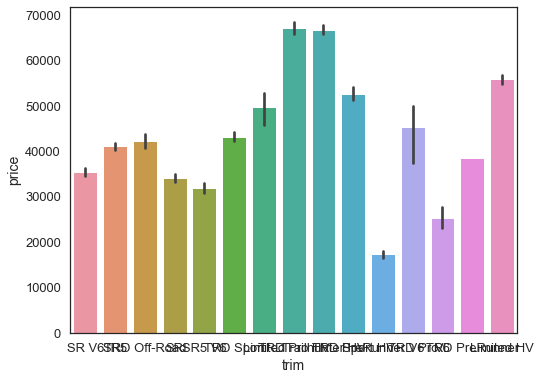

In [40]:
sns.barplot(data=df_tacoma, x='trim', y='price')

<AxesSubplot:xlabel='driveline', ylabel='price'>

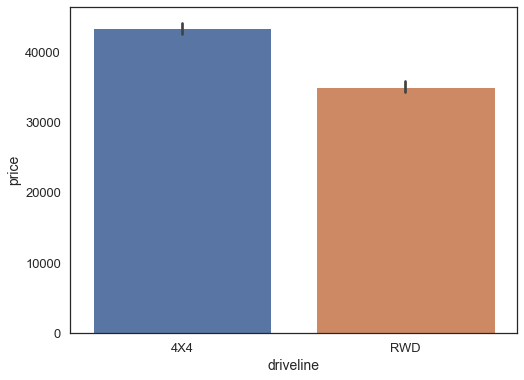

In [41]:
sns.barplot(data=df_tacoma, x='driveline', y='price')

<AxesSubplot:xlabel='transmission', ylabel='price'>

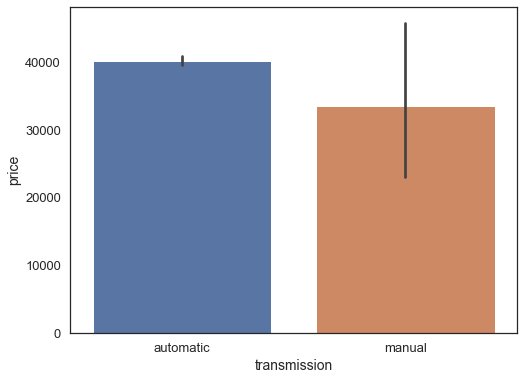

In [42]:
sns.barplot(data=df_tacoma, x='transmission', y='price')

<AxesSubplot:xlabel='year'>

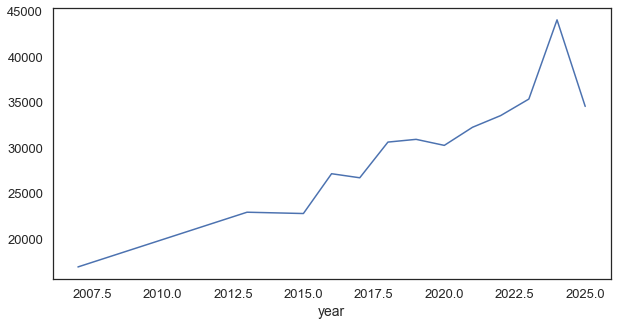

In [43]:
df_tacoma_year = df_tacoma.groupby(['year'])['price'].mean()
df_tacoma_year.plot(figsize=(10,5))

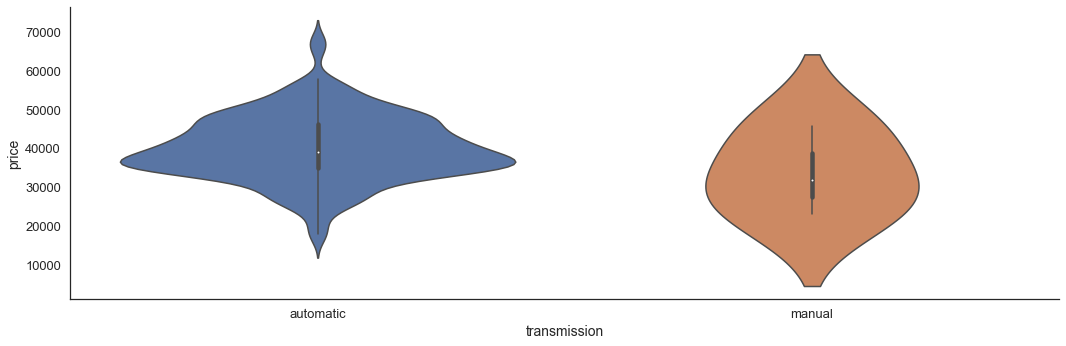

In [44]:
sns.catplot(x='transmission', y='price', data=df_tacoma.sort_values('price', ascending = False), kind='violin', height=5, aspect=3)
plt.show()

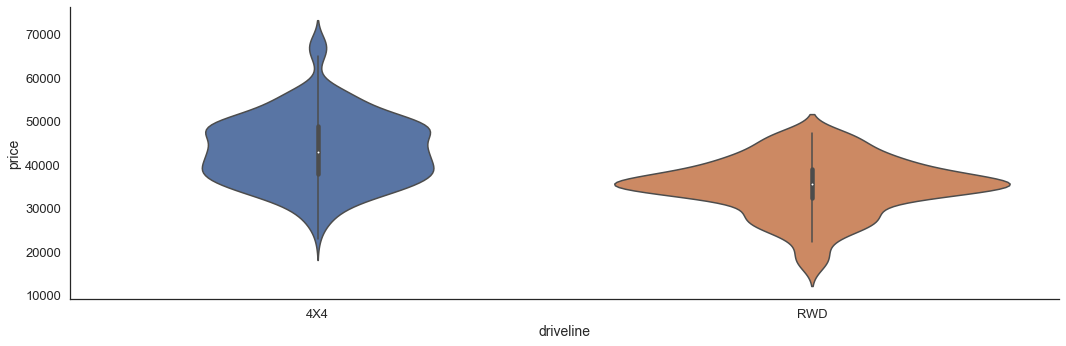

In [45]:
sns.catplot(x='driveline', y='price', data=df_tacoma.sort_values('price', ascending = False), kind='violin', height=5, aspect=3)
plt.show()

## Prepare the Data

In [126]:
TARGET = 'price'

In [127]:
now = datetime.datetime.now()
df_tacoma['year_old'] = 2024 - df_tacoma['year']
df_tacoma.drop(["year"], axis=1, inplace=True)

KeyError: 'year'

In [128]:
df_tacoma.head()

,model,price,mileage,cylinder,daysOnMarket,city,dealer,trim,driveline,transmission,year_old
0,toyota_tacoma,34599,59972.0,6.0,24,Montclair,IE Motors Direct,SR V6,4X4,automatic,2
11,toyota_tacoma,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,SR V6,4X4,automatic,2
15,toyota_tacoma,51599,0.0,4.0,55,Santa Ana,California Motors Direct,SR5,4X4,automatic,0
17,toyota_tacoma,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,SR V6,4X4,automatic,3
20,toyota_tacoma,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,SR V6,4X4,automatic,1


In [129]:
df_tacoma.isna().sum()

model           0
price           0
mileage         0
cylinder        0
daysOnMarket    0
city            0
dealer          0
trim            0
driveline       0
transmission    5
year_old        0
dtype: int64

In [112]:
# assuming that if the mileage is null and its a new car that the mileage is zero
df_tacoma.loc[(df_tacoma['mileage'].isna()) & (df_tacoma['year_old']==0),['mileage']] = 0

In [114]:
# dropping the rows null null cylinder
df_tacoma.drop(df_tacoma.loc[df_tacoma['cylinder'].isna()].index, inplace=True)

In [130]:
df_tacoma.drop(df_tacoma.columns[0],axis=1, inplace=True)

In [131]:
df_tacoma

,price,mileage,cylinder,daysOnMarket,city,dealer,trim,driveline,transmission,year_old
0,34599,59972.0,6.0,24,Montclair,IE Motors Direct,SR V6,4X4,automatic,2
11,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,SR V6,4X4,automatic,2
15,51599,0.0,4.0,55,Santa Ana,California Motors Direct,SR5,4X4,automatic,0
17,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,SR V6,4X4,automatic,3
20,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,SR V6,4X4,automatic,1
...,...,...,...,...,...,...,...,...,...,...
4550,35499,26369.0,6.0,36,Irving,Avis Car Sales - Irving,SR V6,4X4,automatic,1
4612,34525,22456.0,6.0,35,Loveland,Hertz Car Sales Cincinnati,TRD Sport,RWD,automatic,1
4645,34525,22456.0,6.0,35,Loveland,Hertz Car Sales Cincinnati,TRD Sport,RWD,automatic,1
4662,34495,25603.0,6.0,25,Jacksonville,Hertz Car Sales Jacksonville,TRD Sport,RWD,automatic,1


In [117]:
def dist_plots(df):
    plt.figure(figsize=(10,5))
    plt.title("Distribution Plot")
    sns.distplot(df)
    sns.despine()
    plt.show()

0.3262161631467987


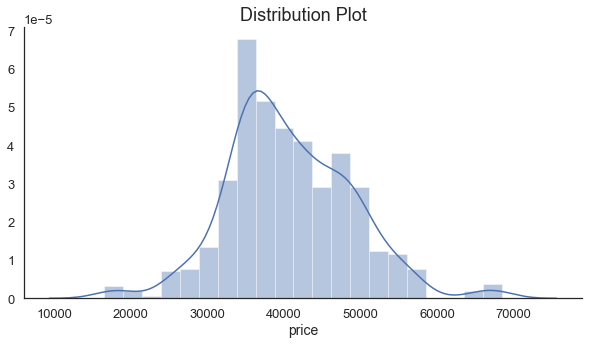

In [118]:
print(df_tacoma[TARGET].skew())
dist_plots(df_tacoma[TARGET])

In [132]:
# Convert the Categorical variables to one-hot encoded features
def create_one_hot(df, categ_colum):
    df = pd.get_dummies(df, columns=categ_colum)
    return df

In [136]:
# removing the two cateogorical that we dont want to use
object_cols.remove('city')
object_cols.remove('dealer')
object_cols.remove('model')

ValueError: list.remove(x): x not in list

In [139]:
object_cols

['trim', 'driveline', 'transmission']

In [140]:
df_car = create_one_hot(df_tacoma, object_cols)

In [141]:
df_car.head()

,price,mileage,cylinder,daysOnMarket,city,dealer,year_old,trim_Limited,trim_Limited HV,trim_PreRunner V6,trim_SR,trim_SR V6,trim_SR5,trim_SR5 V6,trim_TRD Off-Road,trim_TRD PreRunner,trim_TRD Pro,trim_TRD Pro HV,trim_TRD Sport,trim_TRD Sport HV,trim_Trailhunter HV,trim_V6,driveline_4X4,driveline_RWD,transmission_automatic,transmission_manual
0,34599,59972.0,6.0,24,Montclair,IE Motors Direct,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
11,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15,51599,0.0,4.0,55,Santa Ana,California Motors Direct,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
17,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
20,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [142]:
object_cols, num_cols, feature_cols = get_all_cols(df_car, "price", ["city","dealer","model"])

In [143]:
feature_cols

['mileage',
 'cylinder',
 'daysOnMarket',
 'year_old',
 'trim_Limited',
 'trim_Limited HV',
 'trim_PreRunner V6',
 'trim_SR',
 'trim_SR V6',
 'trim_SR5',
 'trim_SR5 V6',
 'trim_TRD Off-Road',
 'trim_TRD PreRunner',
 'trim_TRD Pro',
 'trim_TRD Pro HV',
 'trim_TRD Sport',
 'trim_TRD Sport HV',
 'trim_Trailhunter HV',
 'trim_V6',
 'driveline_4X4',
 'driveline_RWD',
 'transmission_automatic',
 'transmission_manual']

In [144]:
feature_cols_plus_target = [TARGET] + feature_cols

In [145]:
feature_cols_plus_target

['price',
 'mileage',
 'cylinder',
 'daysOnMarket',
 'year_old',
 'trim_Limited',
 'trim_Limited HV',
 'trim_PreRunner V6',
 'trim_SR',
 'trim_SR V6',
 'trim_SR5',
 'trim_SR5 V6',
 'trim_TRD Off-Road',
 'trim_TRD PreRunner',
 'trim_TRD Pro',
 'trim_TRD Pro HV',
 'trim_TRD Sport',
 'trim_TRD Sport HV',
 'trim_Trailhunter HV',
 'trim_V6',
 'driveline_4X4',
 'driveline_RWD',
 'transmission_automatic',
 'transmission_manual']

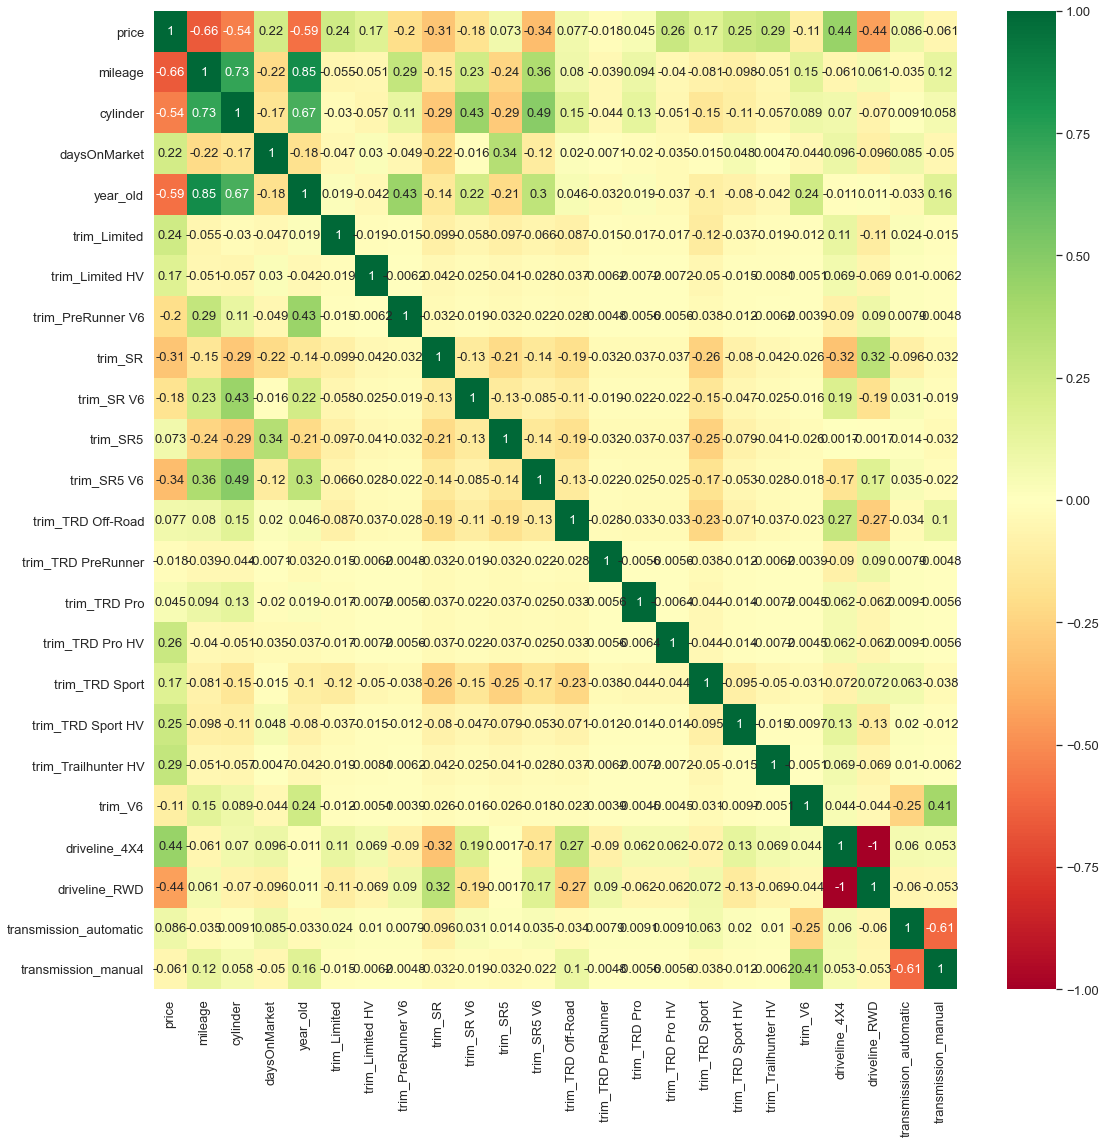

In [146]:
# looking for colinearity
heatmap_df = df_car[feature_cols_plus_target]

plt.figure(figsize = (18,18))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="RdYlGn")

plt.show()

In [147]:
X = df_car[feature_cols]
y = df_car[TARGET]

In [148]:
X.head()

,mileage,cylinder,daysOnMarket,year_old,trim_Limited,trim_Limited HV,trim_PreRunner V6,trim_SR,trim_SR V6,trim_SR5,trim_SR5 V6,trim_TRD Off-Road,trim_TRD PreRunner,trim_TRD Pro,trim_TRD Pro HV,trim_TRD Sport,trim_TRD Sport HV,trim_Trailhunter HV,trim_V6,driveline_4X4,driveline_RWD,transmission_automatic,transmission_manual
0,59972.0,6.0,24,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
11,21516.0,6.0,51,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15,0.0,4.0,55,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
17,41617.0,6.0,122,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
20,22247.0,6.0,57,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [149]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [150]:
print(selection.feature_importances_)

[0.18304466 0.19723533 0.03145682 0.0696919  0.0128771  0.00662305
 0.00891009 0.20569351 0.000852   0.06382927 0.00411669 0.00299354
 0.00042393 0.01180103 0.03011992 0.01094186 0.00650969 0.03226579
 0.00081693 0.05202494 0.06709715 0.00038101 0.00029379]


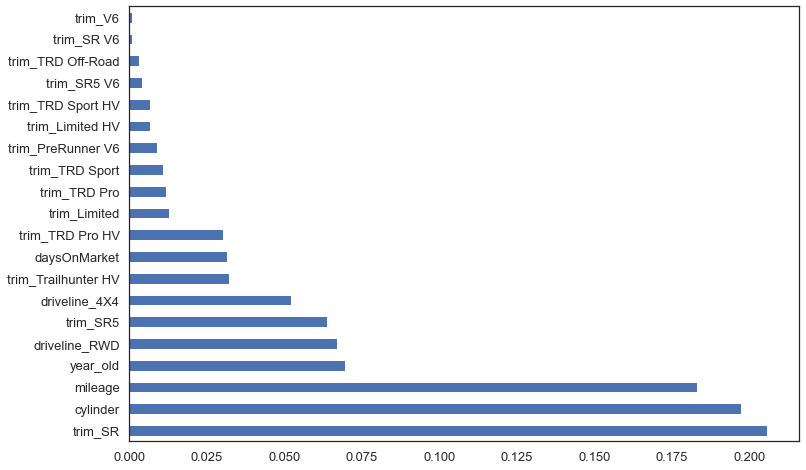

In [151]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
xgboost_model = XGBRegressor(n_jobs=-1)

hist_rf_model = rf_model.fit(X_train, y_train)
hist_xgboost_model = xgboost_model.fit(X_train, y_train)

In [154]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

In [155]:
print(rf_model.score(X_train, y_train))
print(xgboost_model.score(X_train, y_train))

0.9888788986812311
0.9965897508306213


In [156]:
print(rf_model.score(X_test, y_pred_rf))
print(xgboost_model.score(X_test, y_pred_xgboost))

1.0
1.0


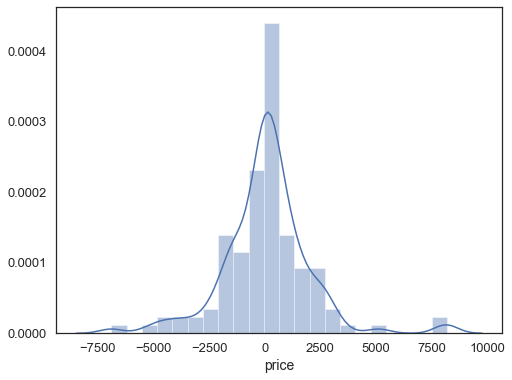

In [157]:
sns.distplot(y_test  - y_pred_rf)
plt.show()

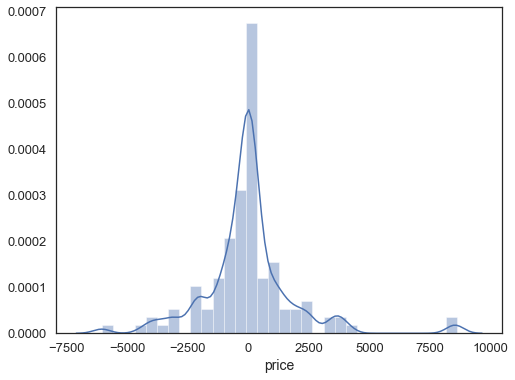

In [158]:
sns.distplot(y_test-y_pred_xgboost)
plt.show()

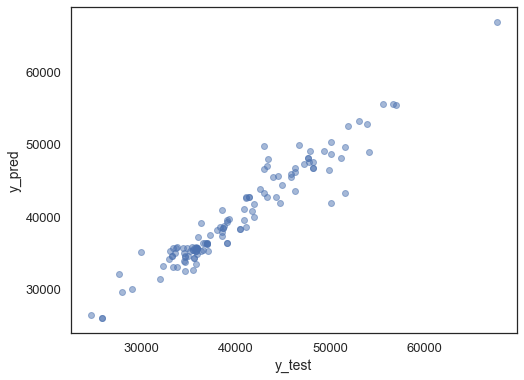

In [159]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

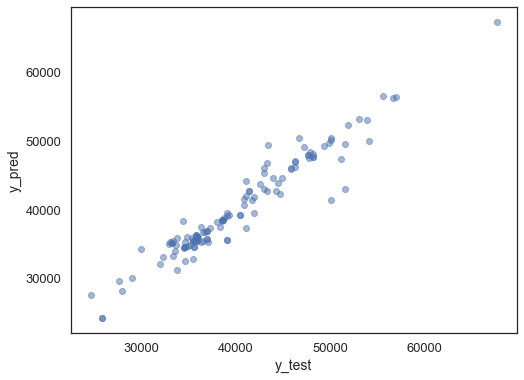

In [160]:
plt.scatter(y_test, y_pred_xgboost, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [161]:
from sklearn import metrics

In [162]:
print('RandomForest')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

print('XGBoost')
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_xgboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))

RandomForest
MAE: 1319.3524835387793
MSE: 3996417.029099371
RMSE: 1999.104056596197
XGBoost
MAE: 1148.221447172619
MSE: 3594936.9139413377
RMSE: 1896.0318863197786


In [163]:
metrics.r2_score(y_test, y_pred_rf)

0.9230828114641726

In [164]:
metrics.r2_score(y_test, y_pred_xgboost)

0.9308099133872558

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
params = {
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}

In [167]:
xgb_model_tuned = RandomizedSearchCV(estimator=xgboost_model,param_distributions=params,scoring='neg_mean_squared_error',n_iter=50,cv=5,random_state=42,n_jobs=1)

In [168]:
xgb_model_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.3000000...
                   iid='deprecated', n_iter=50, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                         

In [169]:
xgb_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [170]:
prediction = xgb_model_tuned.predict(X_test)

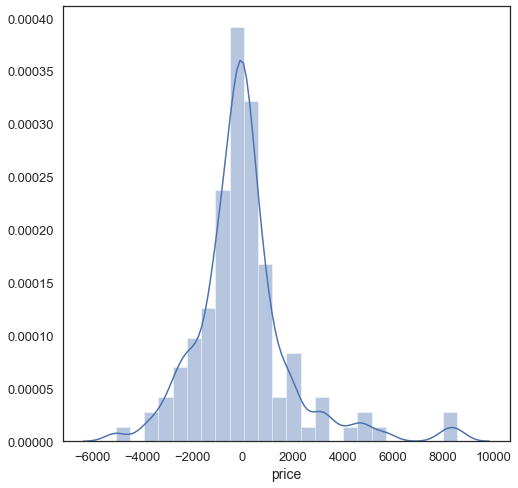

In [171]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

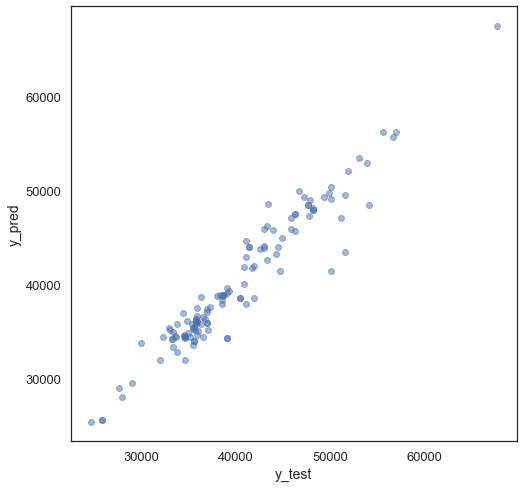

In [172]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [173]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1252.4861576140872
MSE: 3787662.2738219067
RMSE: 1946.1917361405856


In [174]:
metrics.r2_score(y_test,prediction)

0.9271006176021486

In [177]:
# save the final model
import pickle
file = open('xgboost_tuned.pkl','wb')
pickle.dump(xgb_model_tuned,file)